In [1]:
import numpy as np
import torch

import pandas as pd

import matplotlib

matplotlib.rcParams["figure.figsize"] = (10, 8)

from matplotlib import rc

rc('text', usetex=True)
rc('text.latex', preamble='\\usepackage{color}')

import matplotlib.pyplot as plt

plt.style.use("bmh")
plt.rcParams["image.cmap"] = "magma"

import ternary

In [2]:
parents = ["Al", "Ba", "Si"]
# target = "Enthalpy Relative to Elements (meV/atom)"
target = "E_hull (meV/atom)"

df = pd.read_csv("../data/AlBaSi.csv")[parents + [target]]
df

,Al,Ba,Si,E_hull (meV/atom)
0,0.000000,0.666667,0.333333,-310.537000
1,0.000000,0.000000,1.000000,-0.012500
2,0.000000,0.500000,0.500000,-422.539000
3,0.000000,0.333333,0.666667,-359.275000
4,0.000000,0.428571,0.571429,-407.053000
...,...,...,...,...
87,0.461538,0.538462,0.000000,-186.486615
88,0.600000,0.400000,0.000000,-233.068126
89,0.000000,0.538462,0.461538,-396.692385
90,0.000000,0.125000,0.875000,-134.735937


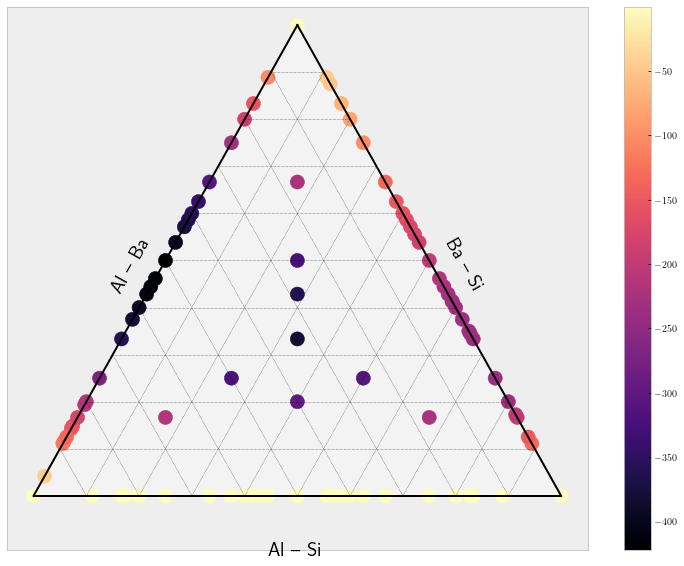

In [12]:
figure, ax = plt.subplots(figsize=(13, 10))
tax = ternary.TernaryAxesSubplot(ax=ax, scale=100)

tax.boundary(linewidth=2.0)
tax.gridlines(multiple=10, color="k")

tax.scatter(
    df[parents].values * 100, 
    c=df[target].values, 
    vmin=df[target].values.min(), 
    vmax=df[target].values.max(), 
    s=200,
    colormap=plt.cm.magma,
    cmap=plt.cm.magma,
    colorbar=True,
)

tax.left_axis_label("Al – Ba", fontsize=20)
tax.right_axis_label("Ba – Si", fontsize=20)
tax.bottom_axis_label("Al – Si", fontsize=20)

tax.clear_matplotlib_ticks()

tax.show()